# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project 4: Smartcab

## Project Report

You will be required to submit a project report along with your modified agent code as part of your submission. As you complete the tasks below, include thorough, detailed answers to each question provided in italics.

### Implement a Basic Driving Agent

To begin, your only task is to get the smartcab to move around in the environment. At this point, you will not be concerned with any sort of optimal driving policy. Note that the driving agent is given the following information at each intersection:

The next waypoint location relative to its current location and heading.
The state of the traffic light at the intersection and the presence of oncoming vehicles from other directions.
The current time left from the allotted deadline.

To complete this task, simply have your driving agent choose a random action from the set of possible actions (None, 'forward', 'left', 'right') at each intersection, disregarding the input information above. Set the simulation deadline enforcement, enforce_deadline to False and observe how it performs.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

### QUESTION: 
Observe what you see with the agent's behavior as it takes random actions. Does the smartcab eventually make it to the destination? Are there any other interesting observations to note?

In [2]:
df = pd.DataFrame(columns=['reached', 'goal_distance','distance_traveled', 'steps'])

df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':102,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':21,'steps':31 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':26,'steps':42 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':58,'steps':72 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':12,'steps':16 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':51,'steps':73 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':100,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':37,'steps':47 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':6,'distance_traveled':74,'steps':101 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':53,'steps':64 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':7,'distance_traveled':110,'steps':135 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':38,'steps':57 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':8,'distance_traveled':44,'steps':57 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':103,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':5,'distance_traveled':89,'steps':125 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':7,'distance_traveled':7,'steps':6 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':4,'distance_traveled':86,'steps':117 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':5,'distance_traveled':97,'steps':125 }, ignore_index=True)
df=df.append( { 'reached':False,'goal_distance':6,'distance_traveled':104,'steps':130 }, ignore_index=True)
df=df.append( { 'reached':True,'goal_distance':5,'distance_traveled':14,'steps':14 }, ignore_index=True)

df['color'] = np.where(df['reached']==True, 'green', 'red')

print df

   reached  goal_distance  distance_traveled  steps  color
0    False            6.0              102.0  130.0    red
1     True            6.0               21.0   31.0  green
2     True            4.0               26.0   42.0  green
3     True            5.0               58.0   72.0  green
4     True            8.0               12.0   16.0  green
5     True            4.0               51.0   73.0  green
6    False            6.0              100.0  130.0    red
7     True            5.0               37.0   47.0  green
8     True            6.0               74.0  101.0  green
9     True            5.0               53.0   64.0  green
10   False            7.0              110.0  135.0    red
11    True            4.0               38.0   57.0  green
12    True            8.0               44.0   57.0  green
13   False            6.0              103.0  130.0    red
14   False            5.0               89.0  125.0    red
15    True            7.0                7.0    6.0  gre

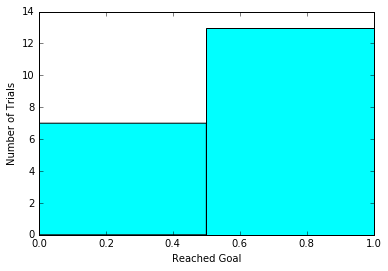

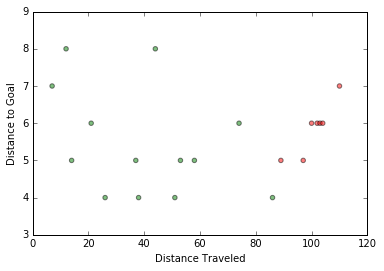

In [4]:
# the histogram of the data
plt.hist(df['reached'], bins=2, facecolor='cyan')
plt.xlabel('Reached Goal')
plt.ylabel('Number of Trials')
plt.show()

# the scatterplot of distance traveled versus goal distance
plt.scatter(df['distance_traveled'], df['goal_distance'], c=df['color'], alpha=0.5)
plt.xlabel('Distance Traveled')
plt.ylabel('Distance to Goal')
plt.show()

**Answer: ** 

See above analysis of twenty logged trials. The agent does reaches the goal the majority of the time (13 of 20 or 65%) however there does not seem to be a correlation in the scatter plot between the original distance to the goal and how far the agent has to travel to reach it (aside from the fact that the longer distance traveled points tend to not reach the goal but the deadline instead). Even some of the longest distances to the goal result in the shorter distances traveled by the agents. 

The key behavior noticed that seems outside of what is expected is that the grid space is toroidal - if the agent moves forward facing up on the top row, it reappears at the bottom row in that column and similarly on the left and right columns. This should partially explain the above observation about the larger distances to goals because the agent could have randomly taken a shortcut across the boundary to a goal that has a calculated Manhattan style distance that does not take into account the space "wrapping."